In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
import matplotlib.ticker as ticker

In [44]:
df_train = pd.read_csv('blackFriday_train.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print("\033[1m" + 'Number of rows in the given train dataset:' + "\033[0m")
print(df_train.shape[0])

print("\033[1m" + 'Number of columns in the given train dataset:'  + "\033[0m")
df_train.shape[1]

Number of rows in the given train dataset:
550068
Number of columns in the given train dataset:


12

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [45]:
df_test = pd.read_csv('blackFriday_test.csv')

In [6]:
print("\033[1m" + 'Number of rows in the given test dataset:' + "\033[0m")
print(df_test.shape[0])

print("\033[1m" + 'Number of columns in the given test dataset:'  + "\033[0m")
df_test.shape[1]

Number of rows in the given test dataset:
233599
Number of columns in the given test dataset:


11

In [46]:
df = df_train.append(df_test) # Merging train and test data 

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
print("\033[1m" + 'Number of rows in the given final dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given final dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given final dataset:
783667
Number of columns in the given final dataset:


12

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


* There seem missing values in 'Product_Category_2', 'Product_Category_3' and 'Purchase'. Missing values in 'Purchase' is due to test dataset merging with train dataset

* The mean purchase amount is **9263.96**

In [11]:
df.describe(include=object).T

,count,unique,top,freq
Product_ID,783667,3677,P00265242,2709
Gender,783667,2,M,590031
Age,783667,7,26-35,313015
City_Category,783667,3,B,329739
Stay_In_Current_City_Years,783667,5,1,276425


* Around 75% of the customers are Male and only 25% of customers are female

* Majority of the customers are of age group 26-35 years

In [12]:
# Checking missing values in the dataset

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [47]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [15]:
df['Product_Category_2'].isnull().sum()

0

In [16]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [48]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [18]:
df['Product_Category_3'].isnull().sum()

0

In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


# Data Analysis

**1. Gender Percentage Plot**

<Figure size 432x288 with 0 Axes>

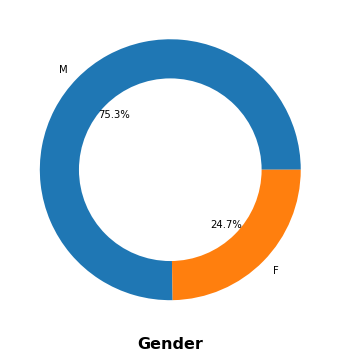

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel('Gender', fontsize=16,fontweight='bold')
plt.ylabel('')
plt.figure()

**2. Marital Status Plot**

<Figure size 432x288 with 0 Axes>

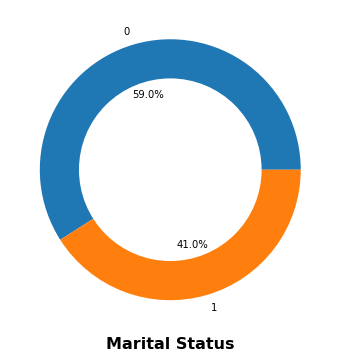

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10,6))
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel('Marital Status', fontsize=16,fontweight='bold')
plt.ylabel('')
plt.figure()

**Around 60% of unmarried or Bachelor adult prefer to shop on Back Friday sale as unmarried individuals may have more flexibility in their schedules and fewer family responsibilities**

**3. Age Group Percentage Plot**

<Figure size 432x288 with 0 Axes>

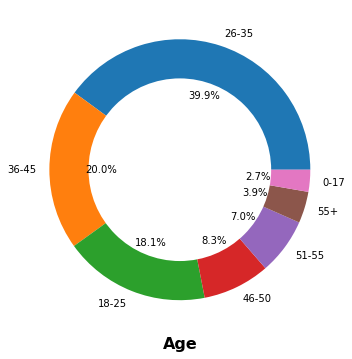

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,6))
df['Age'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel('Age', fontsize=16,fontweight='bold')
plt.ylabel('')
plt.figure()

* **Almost 40% of adults aged 26-35 planned to shop during Black Friday weekend**



* **While younger adults (ages 18-25 and 36-45) are often active participants in online shopping events like Black Friday**

**4. List of top 20 spending users**

<AxesSubplot:ylabel='User_ID'>

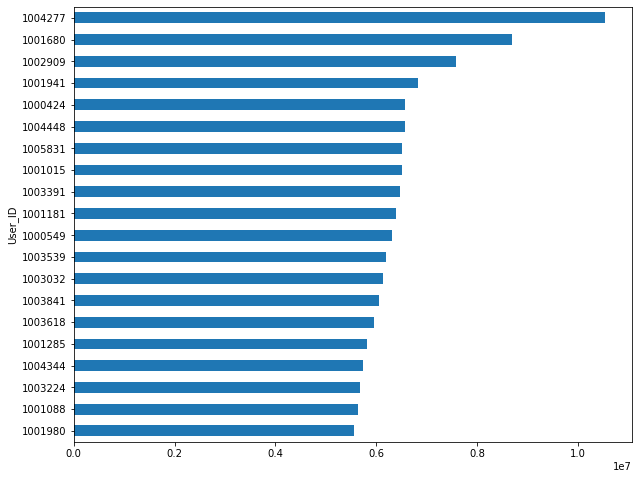

In [23]:
# Which User spent most during black Friday, list the top 20 spending users
plt.figure(figsize = (10,8))
df.groupby('User_ID')['Purchase'].sum().nlargest(20).sort_values().plot(kind='barh')

**It's important for the seller to identify high quality customers.**
These customers, who are more likely to make repeat purchases or purchase higher-value products, represent a valuable source of revenue for the seller. By understanding their needs and preferences, a seller can tailor their products, pricing, and customer service offerings to better serve these customers and increase their loyalty.

**5. User distribution by age group and gender**

<AxesSubplot:xlabel='Age', ylabel='count'>

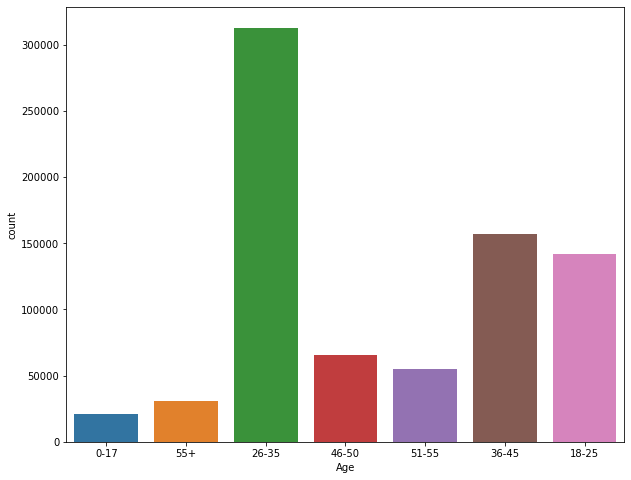

In [24]:
# How about the User Distribution by Age Group? And also consider Gender
plt.figure(figsize = (10,8))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

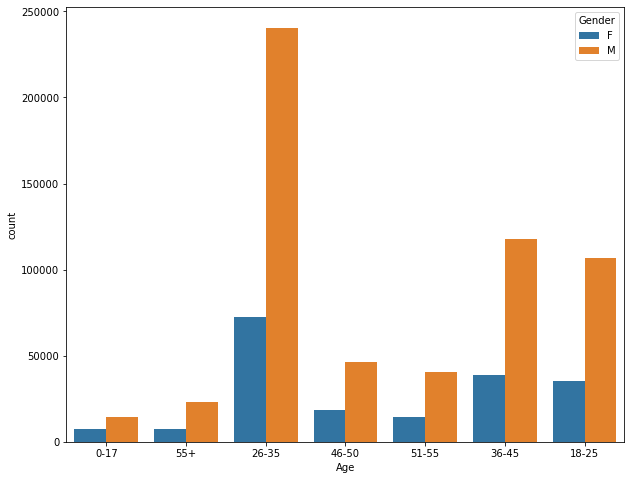

In [25]:
plt.figure(figsize = (10,8))
sns.countplot(df['Age'],hue=df['Gender'])

* **We observe that most of the users who participate in the Black Friday Sale are from age group 26-35, 36-45 and 18-25**

* **The reason for this is that individuals in these age groups tend to have more disposable income**

* **Additionally, younger consumers tend to be more tech-savvy, which makes it easier for them to shop online during Black Friday sales**

* **Male customers shop more comparing to Female customers in Black Friday sale**

* **The reason behind this may be that certain products, such as electronics and gaming consoles, are popular during Black Friday sales and  such products are more popular with male customers**

**6. List of Top 20 Products**

<AxesSubplot:ylabel='Product_ID'>

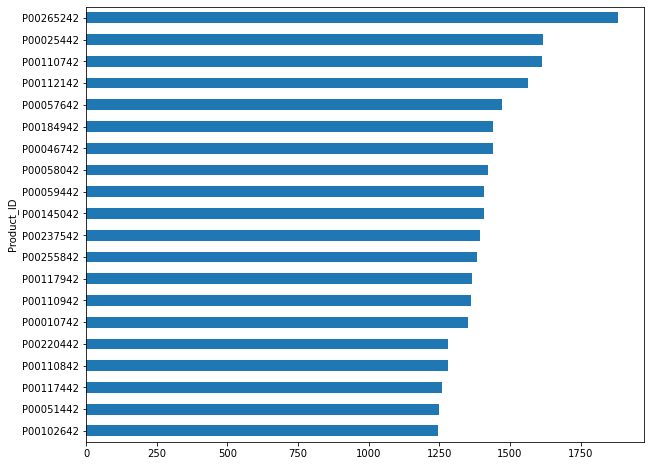

In [26]:
# Which products are most popular during Black Friday, list the top 20
plt.figure(figsize = (10,8))
df.groupby('Product_ID')['Purchase'].count().nlargest(20).sort_values().plot(kind='barh')

**Listing out the most popular products may help the merchant adjust their business strategy and can prepare for the next shopping season better so that to Increase revenue and profit**

**7. User distribution by Occupation**

<AxesSubplot:xlabel='Occupation', ylabel='count'>

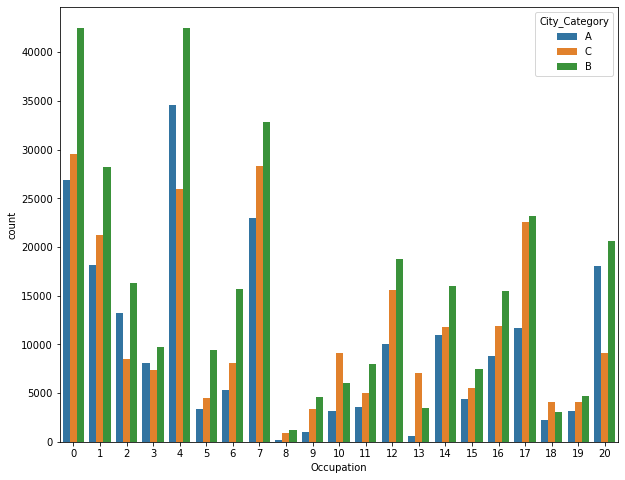

In [27]:
# Look at the users again, this time focus on group by Occupation in different city
plt.figure(figsize = (10,8))
sns.countplot(df['Occupation'], hue = df["City_Category"])

* **The plot shows that for almost all Occupation Category, users from Citi B did more shopping compring to users from City A & Citi C**

* **The reason is City B is larger than City A & Citi C and thus has a larger population**

* **And customers from occupation 0, 4, 7 did more shopping than other occupations**

**8. Purchase Vs Different Product Category**

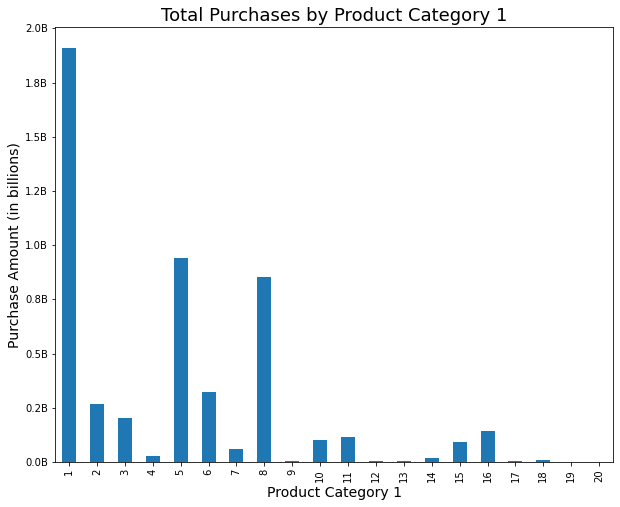

In [28]:
grouped_1 = df.groupby(['Product_Category_1'])['Purchase'].sum()
fig, ax = plt.subplots(figsize=(10, 8))
grouped_1.plot(kind='bar', ax=ax)
# Set the plot title and axis labels
ax.set_title('Total Purchases by Product Category 1',fontsize=18)
ax.set_xlabel('Product Category 1',fontsize=14)
ax.set_ylabel('Purchase Amount (in billions)',fontsize=14)
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}B'.format(x/1e9))
ax.yaxis.set_major_formatter(formatter)
plt.show()

**In Product category 1, Product 1 was highly purchased and it amounts upto 1.9 Billion**

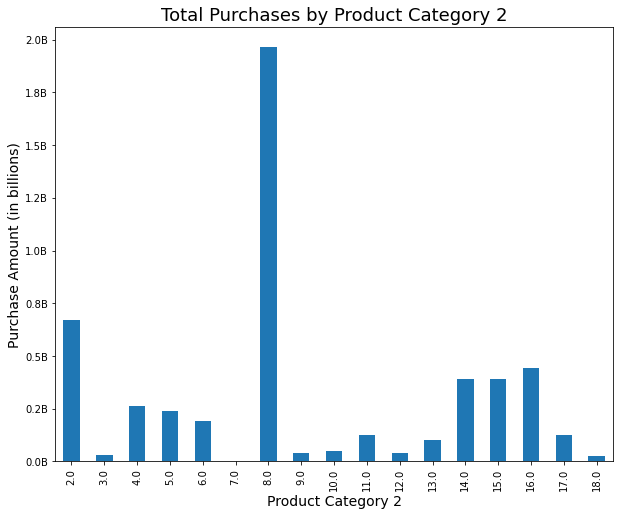

In [29]:
grouped_2 = df.groupby(['Product_Category_2'])['Purchase'].sum()
fig, ax = plt.subplots(figsize=(10, 8))
grouped_2.plot(kind='bar', ax=ax)
# Set the plot title and axis labels
ax.set_title('Total Purchases by Product Category 2',fontsize=18)
ax.set_xlabel('Product Category 2',fontsize=14)
ax.set_ylabel('Purchase Amount (in billions)',fontsize=14)
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}B'.format(x/1e9))
ax.yaxis.set_major_formatter(formatter)
plt.show()

**Product 8 in Product category 2 was purchased highly and amounts to 2 Billion**

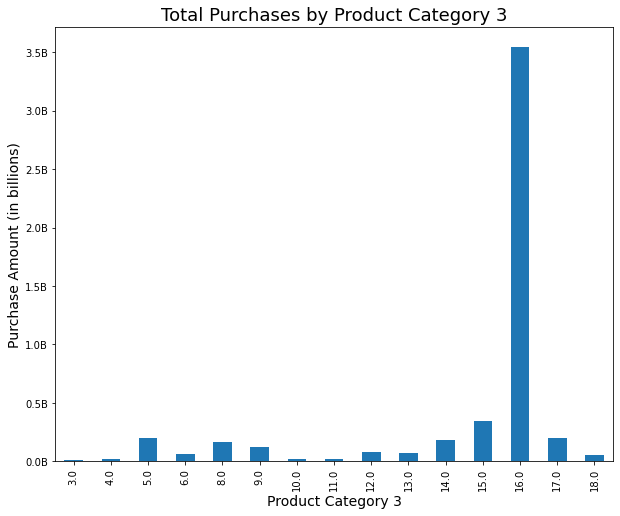

In [27]:
grouped_3 = df.groupby(['Product_Category_3'])['Purchase'].sum()
fig, ax = plt.subplots(figsize=(10, 8))
grouped_3.plot(kind='bar', ax=ax)
# Set the plot title and axis labels
ax.set_title('Total Purchases by Product Category 3',fontsize=18)
ax.set_xlabel('Product Category 3',fontsize=14)
ax.set_ylabel('Purchase Amount (in billions)',fontsize=14)
formatter = ticker.FuncFormatter(lambda x, pos: '{:.1f}B'.format(x/1e9))
ax.yaxis.set_major_formatter(formatter)
plt.show()

**Product 16 in product category 3 was purchased upto 3.5 Billion**

<AxesSubplot:>

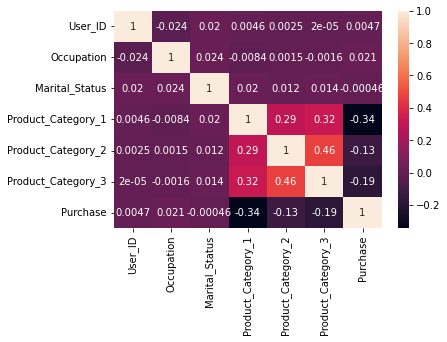

In [31]:
# Heatmap of correlations between numerical variables
sns.heatmap(df.corr(), annot=True)

**Feature Engineering**

In [49]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [50]:
# Handling categorial feature 'Age'
df['Age'] = df['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [51]:
# Handling categorial feature 'Gender'
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [52]:
# Handling categorial feature 'City_Category'
df['City_Category'] = df['City_Category'].map({'A':1,'B':2,'C':3})

In [53]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [54]:
 df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [55]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [57]:
# Dropping 'User_ID' and 'Product_ID'
df = df.drop(['User_ID','Product_ID'],axis=1)

In [58]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0


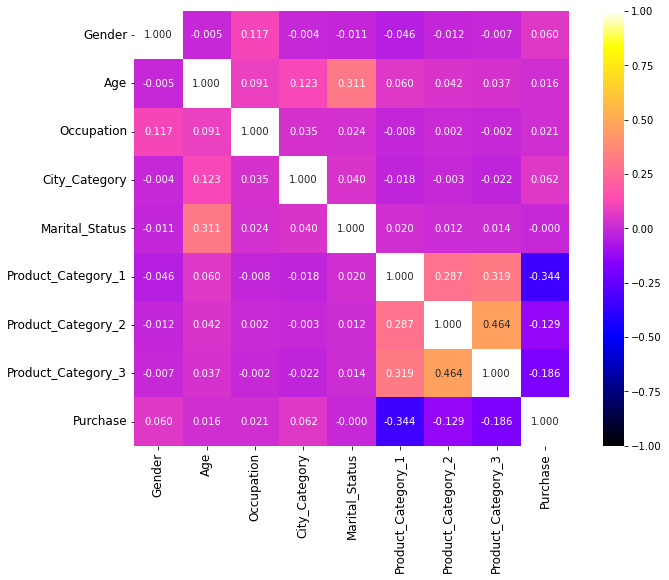

In [61]:
# Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gnuplot2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

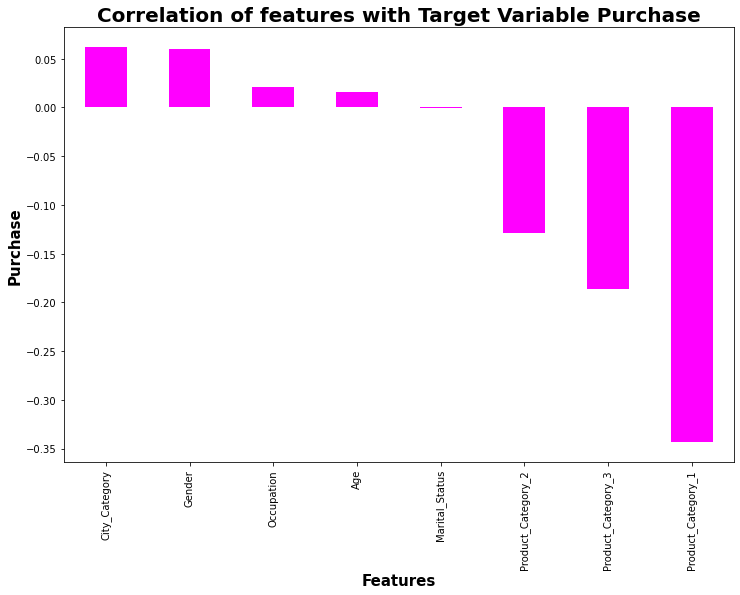

In [62]:
plt.figure(figsize = (12,8))
df.corr()['Purchase'].drop(['Purchase']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Purchase',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Purchase',fontsize = 20,fontweight='bold')
plt.show()

In [65]:
# Seperating features and target variable for regression task (Purchase amount prediction)

X = df.drop('Purchase',axis=1)

y = df['Purchase']

In [66]:
# Scaling of data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X)

In [67]:
# Checking multicollinearity in the dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.016393,Gender
1,1.135356,Age
2,1.023892,Occupation
3,1.017695,City_Category
4,1.001579,Stay_In_Current_City_Years
5,1.107179,Marital_Status
6,1.150057,Product_Category_1
7,1.309904,Product_Category_2
8,1.339015,Product_Category_3


**No multicollinearity exists in the dataset**